In [1]:
from __future__ import absolute_import, division, print_function

import matplotlib.pyplot as plt
import numpy as np
import pyeit.mesh as mesh
import os
from matplotlib.patches import Circle
from src.util import create_trajectory
from matplotlib import cm
from matplotlib.colors import Normalize

In [2]:
from src.util import create_cylinder_mesh, plot_tank_and_ball, voxel_ball

In [3]:
from src.classes import Boundary, TankProperties32x2, BallAnomaly
boundary = Boundary()
tank = TankProperties32x2()
num_voxels = 32
scale_factor = num_voxels / tank.T_d  # 32 voxels / 194mm (tank diameter)
ball_diameter = 40
ball = BallAnomaly(x=10.5, y=15, z=10, d=ball_diameter*scale_factor, perm=1)


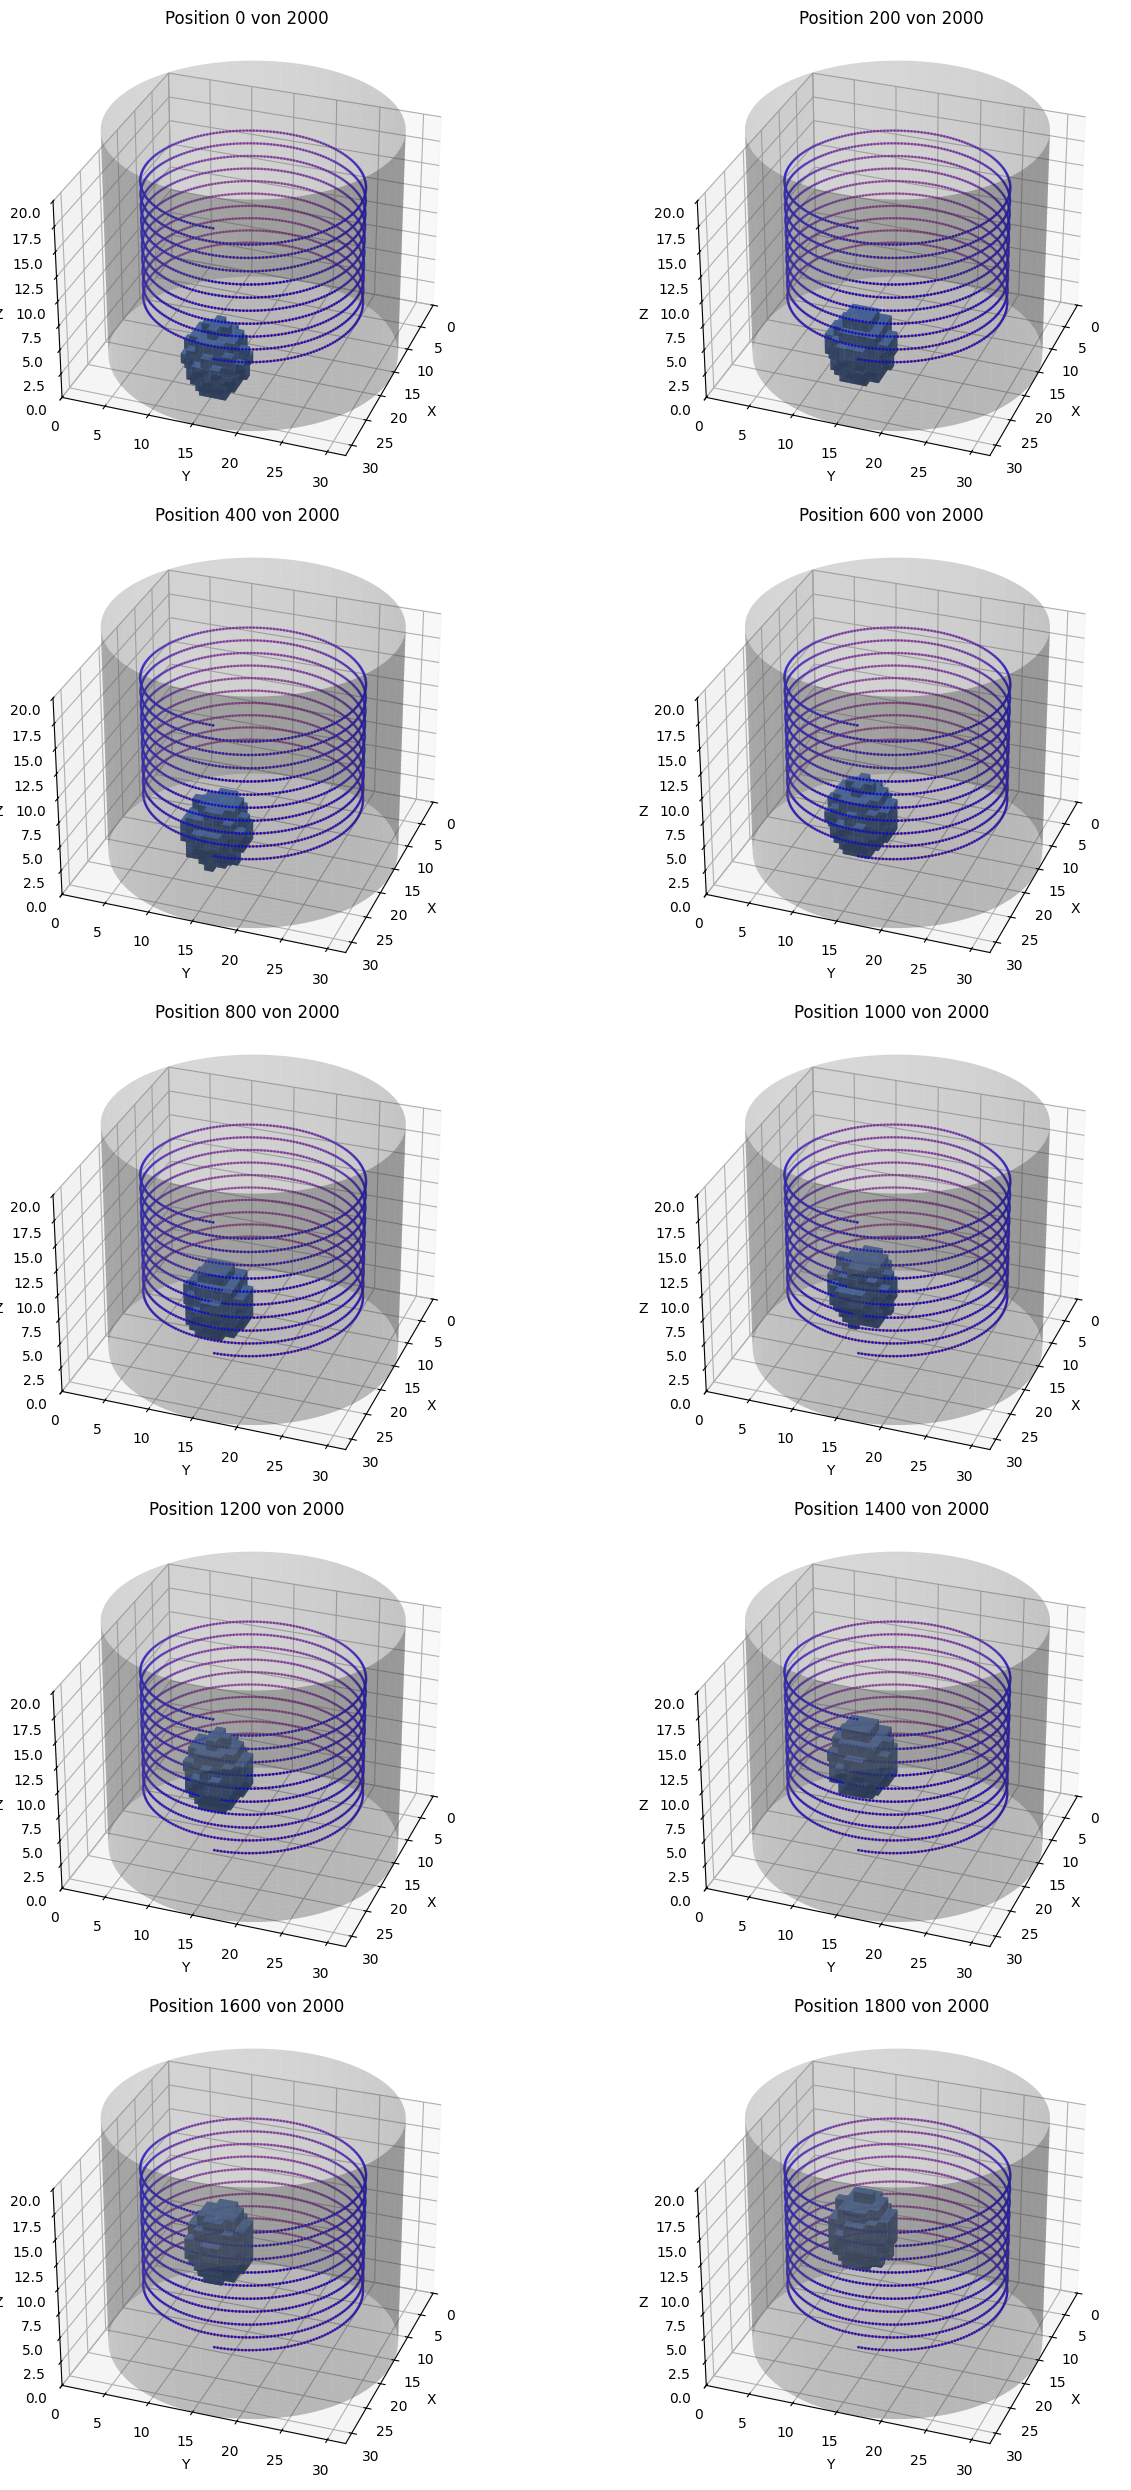

In [9]:
traj_type = "Helix"
num_points = 2000
radius = 0.75*tank.T_r  
fig, axs = plt.subplots(5, 2, figsize=(15, 25), subplot_kw={'projection': '3d'})

points = create_trajectory(traj_type, radius, num_points)

scaled_points = points.copy()
scaled_points = scaled_points * scale_factor 
scaled_points[:, 0] += 16  
scaled_points[:, 1] += 16

x_tank, y_tank, z_tank = create_cylinder_mesh(tank, n_points=100)
x_tank = x_tank * scale_factor
y_tank = y_tank * scale_factor
z_tank = z_tank * scale_factor
x_tank += 16  
y_tank += 16

step = num_points // 10  # 200 Punkte Abstand
indices = [i * step for i in range(10)]  # [0, 200, 400, ..., 1800]

for idx, ax in enumerate(axs.flat):
    # Plot Tank
    ax.plot_surface(x_tank, y_tank, z_tank, alpha=0.3, color='gray')
    
    # Plot Trajektorie
    ax.plot(scaled_points[:, 0], scaled_points[:, 1], scaled_points[:, 2], color="red", alpha=0.5)
    ax.scatter(scaled_points[:, 0], scaled_points[:, 1], scaled_points[:, 2], color='blue', marker='o', s=1)
    
    # Ball Position für diesen Subplot
    ball_pos = scaled_points[indices[idx]]
    ball.x = ball_pos[0]
    ball.y = ball_pos[1]
    ball.z = ball_pos[2]
    
    # Erstelle und plotte Ball Voxel
    ball_voxels = voxel_ball(ball, boundary)
    ax.voxels(ball_voxels.transpose(1, 0, 2), facecolors='cornflowerblue', alpha=0.8)
    
    ax.view_init(elev=30, azim=20)
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.set_zlabel('Z')
    ax.set_xlim([0, 32])
    ax.set_ylim([0, 32])
    ax.set_zlim([0, 20])
    
    ax.set_title(f'Position {indices[idx]} von {num_points}')

plt.tight_layout()
plt.show()